In [1]:
from pandas import DataFrame, Series
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Q1: Read in data

In [2]:
gold = pd.read_csv('gold.txt', '\t', header=None, names=['url', 'category'])
gold.columns.values

array(['url', 'category'], dtype=object)

In [3]:
labels = pd.read_csv('labels.txt', '\t', header = None, names=['turk', 'url', 'category'])
labels.columns.values

array(['turk', 'url', 'category'], dtype=object)

# Q2: Split into two DataFrames 

In [4]:
goldURLs = gold['url'].values

labels_on_gold = labels[labels['url'].map(lambda x: x in goldURLs)]

labels_unknown = labels[labels['url'].map(lambda x: x not in goldURLs)]

In [5]:
def correct(S):
    return (S.category_g == S.category_l)

labels_on_gold['correct'] = gold.merge(labels_on_gold,
                                      left_on = "url",
                                      right_on = "url",
                                      suffixes = ["_g", "_l"]).T.apply(correct)







/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [33]:
rater_check_total = gold.merge(labels, left_on = "url", right_on ="url", suffixes = ["_g", "_l"])
mask = rater_check_total['category_g'] == rater_check_total['category_l']
rater_check_correct = rater_check_total[mask]
rater_correct = rater_check_correct.groupby('turk')['url'].count()
rater_total = rater_check_total.groupby('turk')['url'].count()

rater_goodness = DataFrame(rater_correct)
rater_goodness.columns = ['correct']
rater_goodness['total'] = rater_total

rater_goodness['accuracy'] = rater_goodness['correct'] / rater_goodness['total']

rater_goodness.iloc[:10]

,correct,total,accuracy
turk,,,
A112DVP1KG4QZU,1,1,1.000000
A1253FXHCZ9CWM,15,29,0.517241
A12CY1Q7XKJJDE,1,1,1.000000
A12RE8G66WTO8B,15,20,0.750000
A12Y1GTGIQDGRA,1,3,0.333333
A13CEW9JGDWGX1,1,1,1.000000
A13OE9GBRJ0S2U,3,4,0.750000
A14IQ4GLNWNPOJ,1,1,1.000000
A153PKAL7OAY36,107,148,0.722973


# Q3: Compute accuracies of turks

In [6]:
rater_goodness = labels_on_gold.groupby('turk')[['category','correct']].agg('count')

rater_goodness['accuracy'] = rater_goodness['correct'] / rater_goodness['category']

rater_goodness.iloc[:10]

,category,correct,accuracy
turk,,,
A112DVP1KG4QZU,1,0,0.000000
A1253FXHCZ9CWM,29,4,0.137931
A12CY1Q7XKJJDE,1,0,0.000000
A12RE8G66WTO8B,20,2,0.100000
A12Y1GTGIQDGRA,3,0,0.000000
A13CEW9JGDWGX1,1,0,0.000000
A13OE9GBRJ0S2U,4,0,0.000000
A14IQ4GLNWNPOJ,1,0,0.000000
A153PKAL7OAY36,148,9,0.060811


# Q4: Odds ratios

In [34]:
rater_goodness['odds'] = rater_goodness['accuracy'] / (1.001 - rater_goodness['accuracy'])

rater_goodness.iloc[:10]

,correct,total,accuracy,odds
turk,,,,
A112DVP1KG4QZU,1,1,1.000000,1000.000000
A1253FXHCZ9CWM,15,29,0.517241,1.069214
A12CY1Q7XKJJDE,1,1,1.000000,1000.000000
A12RE8G66WTO8B,15,20,0.750000,2.988048
A12Y1GTGIQDGRA,1,3,0.333333,0.499251
A13CEW9JGDWGX1,1,1,1.000000,1000.000000
A13OE9GBRJ0S2U,3,4,0.750000,2.988048
A14IQ4GLNWNPOJ,1,1,1.000000,1000.000000
A153PKAL7OAY36,107,148,0.722973,2.600369


# Q5: Most accurate turks

In [39]:
rater_goodness[rater_goodness['total'] >= 20].sort_values('odds', ascending = False).iloc[:10]

,correct,total,accuracy,odds
turk,,,,
A2U0R4X38GUKZE,19,20,0.950000,18.627451
A22C0PJUBFJTI0,33,36,0.916667,10.869565
A23YQUBXZPKILZ,21,24,0.875000,6.944444
ATVALOQVDCMZW,88,103,0.854369,5.826657
A1HIXWH4OXT8S4,33,40,0.825000,4.687500
A3220HG1O83HQ4,18,22,0.818182,4.475385
A32W20KGQXS0LL,20,25,0.800000,3.980100
A20PWAB7G3HDHU,16,20,0.800000,3.980100
AJSJVK40F5HM6,22,28,0.785714,3.649635


# Q6: Rating counts versus acurracy

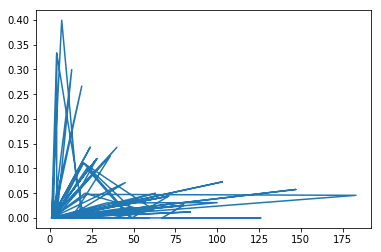

In [52]:
plot(rater_goodness['category'], rater_goodness['odds'])

# edit

# Q7: Overall predicted odds

In [41]:
rater_goodness['rank'] = rater_goodness['total'].rank()

bestQuantileTurks = rater_goodness[rater_goodness['rank'] >= 3*len(rater_goodness)/4]

bestQuantileTurks.iloc[:10]

,correct,total,accuracy,odds,rank
turk,,,,,
A1253FXHCZ9CWM,15,29,0.517241,1.069214,194.5
A12RE8G66WTO8B,15,20,0.750000,2.988048,178.0
A153PKAL7OAY36,107,148,0.722973,2.600369,226.0
A1DCIXV1JC91MY,13,22,0.590909,1.440922,186.0
A1HIXWH4OXT8S4,33,40,0.825000,4.687500,203.0
A1JTOT0DWM6QGL,22,29,0.758621,3.129890,194.5
A1PXXEOGQ76RNJ,21,41,0.512195,1.047852,204.0
A1XFA0A9Z3LAZJ,15,19,0.789474,3.732272,175.0
A20PWAB7G3HDHU,16,20,0.800000,3.980100,178.0


In [44]:
def reliable75(turks):
    merge = bestQuantileTurks.merge(turks,
                                    left_on = 'turk',
                                    right_on = 'turk')
    
    return merge['odds'].product()
    

overallOdds = labels_unknown.groupby(['url', 'category'])['turk'].agg(reliable75)

overallOdds.iloc[:10]

url                          category
http://0-101.net             G            2.155963
http://000.cc                G            1.460583
                             P            1.000000
http://0000.jp               G           10.373583
http://000relationships.com  G            2.912430
                             P            1.851852
                             R            1.000000
http://000vitamins.com       G            2.710047
http://000webhost.com        G           11.159502
http://003my.com             G            4.912040
Name: turk, dtype: float64

# Q8: Predicted categories

In [45]:
result_75 = overallOdds.unstack().fillna(0)
result_75['top odds'] = result_75.T.max()
result_75['top category'] = result_75.T.idxmax() # might need to check for ties


result_75.iloc[:10]

category,G,P,R,X,top odds,top category
url,,,,,,
http://0-101.net,2.155963,0.000000,0.00000,0.000000,2.155963,G
http://000.cc,1.460583,1.000000,0.00000,0.000000,1.460583,G
http://0000.jp,10.373583,0.000000,0.00000,0.000000,10.373583,G
http://000relationships.com,2.912430,1.851852,1.00000,0.000000,2.912430,G
http://000vitamins.com,2.710047,0.000000,0.00000,0.000000,2.710047,G
http://000webhost.com,11.159502,0.000000,0.00000,0.000000,11.159502,G
http://003my.com,4.912040,0.000000,0.00000,0.000000,4.912040,G
http://007absolutehardcore.com/early_cumshots/index.html,0.000000,3.346522,12.29045,293.252871,293.252871,X
http://007swz.cn,1.393883,0.000000,0.00000,0.000000,1.393883,G


# Q9: Predicted categories using more turks

In [46]:
best3QuantileTurks = rater_goodness[rater_goodness['rank'] >= len(rater_goodness)/4]

best3QuantileTurks.iloc[:10]

def reliable25(turks):
    merge = best3QuantileTurks.merge(turks,
                                    left_on = 'turk',
                                    right_on = 'turk')
    
    return merge['odds'].product()

result_25 = labels_unknown.groupby(['url', 'category'])['turk'].agg(reliable25).unstack().fillna(0)
result_25['top odds'] = result_25.T.max()
result_25['top category'] = result_25.T.idxmax() # might need to check for ties

result_25.iloc[:10]

category,G,P,R,X,top odds,top category
url,,,,,,
http://0-101.net,0.353741,0.00000,0.000000,0.000000,0.353741,G
http://000.cc,0.044973,0.50000,0.000000,0.000000,0.500000,P
http://0000.jp,0.014976,0.00000,0.000000,0.000000,0.014976,G
http://000relationships.com,0.008454,0.65000,0.250000,0.000000,0.650000,P
http://000vitamins.com,0.031085,0.00000,0.000000,0.000000,0.031085,G
http://000webhost.com,0.081788,0.00000,0.000000,0.000000,0.081788,G
http://003my.com,0.247619,0.00000,0.000000,0.000000,0.247619,G
http://007absolutehardcore.com/early_cumshots/index.html,0.000000,0.39239,0.338824,0.257526,0.392390,P
http://007swz.cn,0.146341,0.00000,0.000000,0.000000,0.146341,G


In [47]:
final = result_75.merge(result_25,
                       left_on = 'url',
                       right_on = 'url',
                       suffixes = ['_75', '_25']).groupby(['top category_75',
                                                        'top category_25'])['top category_75'].count().unstack()

final

top category_25,G,P,R,X
top category_75,,,,
G,5045,2702,935,593
P,44,364,198,70
R,16,67,87,59
X,85,99,199,144


It seems like the most errors are at the intersection of categories 'P' and 'G'.